In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
plt.style.use('seaborn-dark-palette')

In [5]:
mu1 = 2
mu2 = 3
var1 = 0.01
var2 = 0.01

In [6]:
s1 = np.random.normal(mu1,var1,20)
s2 = np.random.normal(mu2,var2,30)
s = np.concatenate([s1,s2])

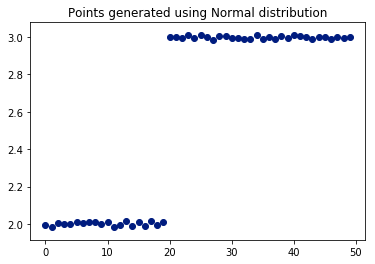

In [7]:
plt.scatter(range(len(s)),s);
plt.title('Points generated using Normal distribution');

In [8]:
# initialize the params
alpha = np.min(s)
beta = np.max(s)
var = np.var(s)
theta = 0.5
n_itr = 200
gamma = np.zeros((len(s),))
results = [[0,0,0,0]]

In [9]:
for k in range(n_itr):
    # define the denisty functions
    phi1 = norm(loc=alpha, scale = var)
    phi2 = norm(loc=beta, scale=var)
    # expectation step
    gamma = np.divide(theta*phi2.pdf(s), theta*phi2.pdf(s) + (1-theta)*phi1.pdf(s))
    # maximization step
    alpha = np.divide(np.dot(1-gamma, s), np.sum(1-gamma))
    beta = np.divide(np.dot(gamma, s), np.sum(gamma))
    var = np.sum(np.square( s - alpha*(1-gamma) - beta*gamma ) )/len(s)
    theta = np.sum(gamma)/len(s)
    # stop the iterations if values explode
    if np.isnan(alpha) or (results[-1][0]==alpha):
        break
    # results
    print(alpha, beta, theta)
    # store the results
    results.append([alpha,beta,theta,gamma])

2.0016931837437766 2.9992239040014295 0.599982972126536


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


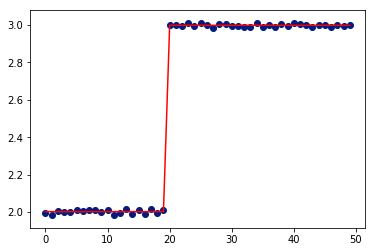

In [10]:
# solution is stored in last but one 
alpha = results[-1][0]
beta = results[-1][1]
theta = results[-1][2]
gamma = results[-1][3]
plt.scatter(range(len(s)),s)
plt.plot(range(len(s)), (1-gamma)*alpha + gamma*beta, c="r")
plt.show()